In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

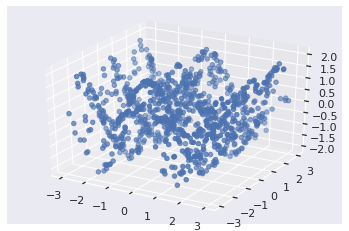

In [2]:
# We make the dataset

N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniform distribution in [-3, 3]
y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

In [3]:
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [4]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [5]:
def train_model(model, Loss, optimizer, X_train, y_train, epochs=1000):
    train_losses = np.zeros(epochs)
    for iteration in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = Loss(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses[iteration] = loss.item()
        if (iteration+1) % 50 == 0:
            print("Epoch: {}/{}, Train Loss: {:.6}".format(iteration+1, epochs, loss.item()))

    return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))
train_losses = train_model(model, Loss, optimizer, X_train, y_train)

Epoch: 50/1000, Train Loss: 0.60746
Epoch: 100/1000, Train Loss: 0.33484
Epoch: 150/1000, Train Loss: 0.218715
Epoch: 200/1000, Train Loss: 0.142644
Epoch: 250/1000, Train Loss: 0.108833
Epoch: 300/1000, Train Loss: 0.0660036
Epoch: 350/1000, Train Loss: 0.0251883
Epoch: 400/1000, Train Loss: 0.00897327
Epoch: 450/1000, Train Loss: 0.00604908
Epoch: 500/1000, Train Loss: 0.00363626
Epoch: 550/1000, Train Loss: 0.00298659
Epoch: 600/1000, Train Loss: 0.00380205
Epoch: 650/1000, Train Loss: 0.00243671
Epoch: 700/1000, Train Loss: 0.00227467
Epoch: 750/1000, Train Loss: 0.00214294
Epoch: 800/1000, Train Loss: 0.00203289
Epoch: 850/1000, Train Loss: 0.00194131
Epoch: 900/1000, Train Loss: 0.00250077
Epoch: 950/1000, Train Loss: 0.00182302
Epoch: 1000/1000, Train Loss: 0.00190788


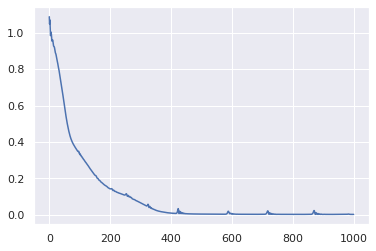

In [6]:
plt.plot(train_losses)

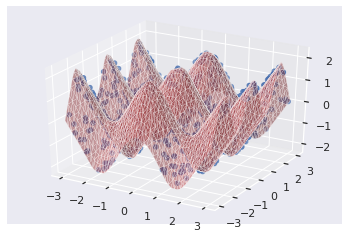

In [10]:
#Plot the predicted surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True, color='r', alpha=0.5)
    plt.show()

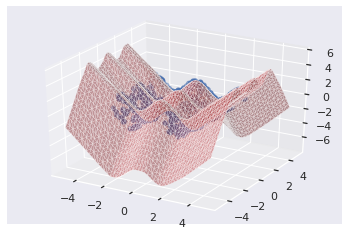

In [11]:
#Test interpolation 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

with torch.no_grad():
    line = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True, color='r', alpha=0.5)
    plt.show()